<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/clase8_morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# importar librerias necesarias 

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from skimage import data
from skimage.util import img_as_ubyte
from skimage import io

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/colab/images


In [0]:
def readRGB(imgPath):
    img = cv2.imread(imgPath)
    img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

def displayGray3(a, b,c,title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(3,3))
    plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayGray2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

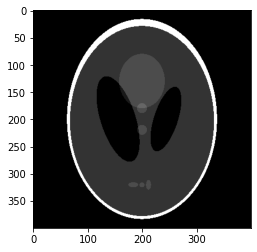

In [2]:
orig_phantom = img_as_ubyte(data.shepp_logan_phantom())
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)


## **Erosion**

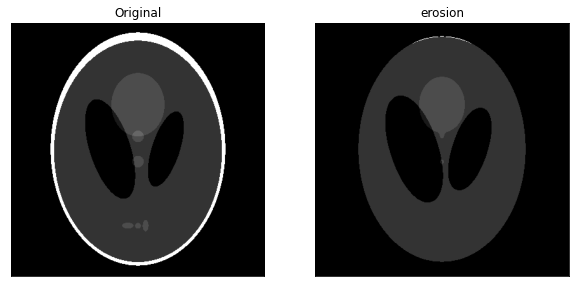

In [6]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

selem = disk(6)
eroded = erosion(orig_phantom, selem)
displayGray2(orig_phantom, eroded,'Original','erosion')

## **Dilation**

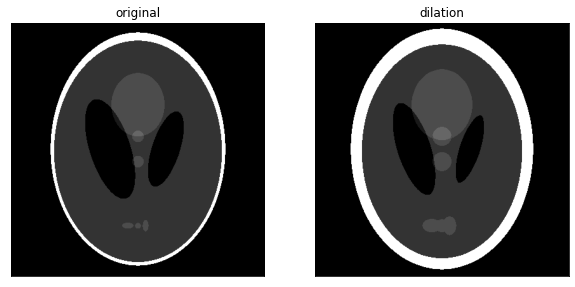

In [8]:
dilated = dilation(orig_phantom, selem)
displayGray2(orig_phantom, dilated,"original",'dilation')

## **Opening**

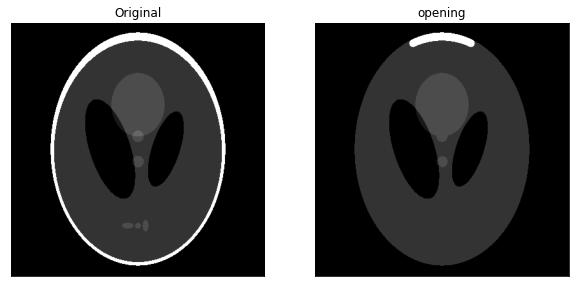

In [10]:
opened = opening(orig_phantom, selem)
displayGray2(orig_phantom, opened,'Original', 'opening')

## **Closing**

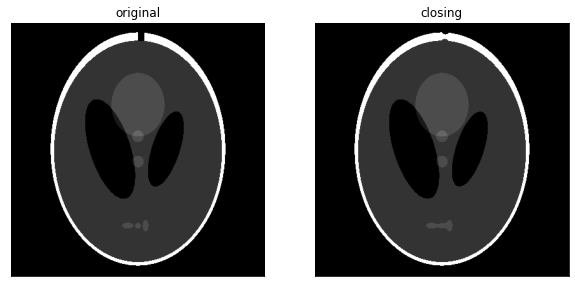

In [12]:
phantom = orig_phantom.copy()
phantom[10:30, 200:210] = 0

closed = closing(phantom, selem)
displayGray2(phantom, closed, 'original', 'closing')

## **Black tophat**

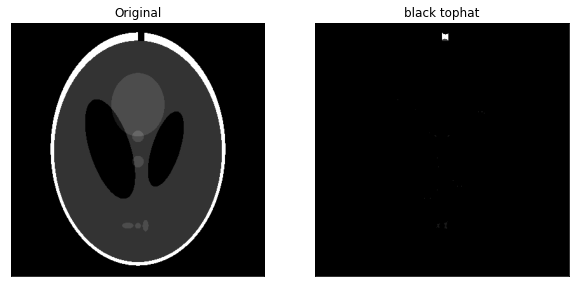

In [13]:
b_tophat = black_tophat(phantom, selem)
displayGray2(phantom, b_tophat,'Original', 'black tophat')

## **White tophat**

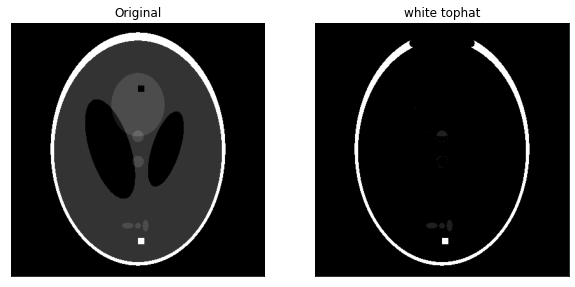

In [14]:
phantom = orig_phantom.copy()
phantom[340:350, 200:210] = 255
phantom[100:110, 200:210] = 0

w_tophat = white_tophat(phantom, selem)
displayGray2(phantom, w_tophat,'Original', 'white tophat')

## **Skeletonize**

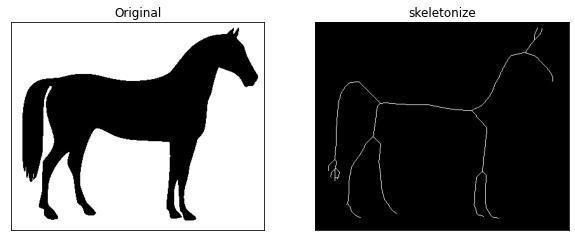

In [15]:
horse = data.horse()

sk = skeletonize(horse == 0)
displayGray2(horse, sk,'Original','skeletonize')

## **Convex hull**

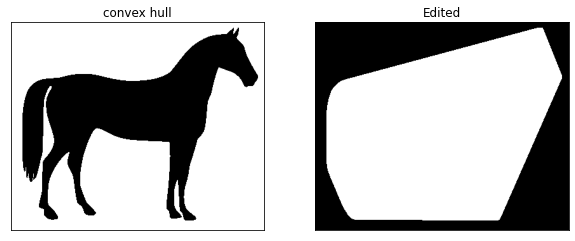

In [16]:
hull1 = convex_hull_image(horse == 0)
displayGray2(horse, hull1, 'convex hull')

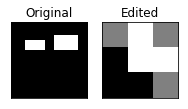

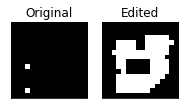

In [0]:
"""HIT OR MISS"""
def mostrar_kernel(kernel,rate):
      kernel = (kernel + 1) * 127
      kernel = np.uint8(kernel)
      rate = 50
      kernel = cv2.resize(kernel, None, fx = rate, fy = rate, interpolation = cv2.INTER_NEAREST)
      #plt.imshow(kernel,cmap='gray')
      #cv2.imshow("kernel", kernel)
      #cv2.moveWindow("kernel", 0, 0)
      return kernel
                                       
input_image = np.zeros((16,16), dtype="uint8")
input_image[4:6,3:7]=255
input_image[3:6, 9:14]=255
#plt.imshow(input_image,cmap='gray')

kernel0 = np.array((
        [0, 1, 0],
        [-1, 1, 1],
        [-1, -1, 0]), dtype="int")


rate = 50
img_kernel=mostrar_kernel(kernel0,rate)

displayGray2(input_image,img_kernel)

input_image[4,14]=255
input_image[6:7, 2:14]=255
input_image[7:8, 3:13]=255
input_image[8:10, 3:5]=255
input_image[8:11, 10:14]=255
input_image[10, 4]=255
input_image[11:15, 3:10]=255
input_image[11:14, 10:11]=255
input_image[11:13, 11:12]=255
input_image[11:12, 12:13]=255

output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel0)
output_image = cv2.resize(output_image, None , fx = rate, fy = rate, interpolation = cv2.INTER_NEAREST)

output_image = output_image 
#cv2.imshow("Hit or Miss" , output_image)
#cv2.moveWindow("Hit or Miss"  , 500, 200)

input_image = cv2.resize(input_image, None, fx = rate, fy = rate, interpolation = cv2.INTER_NEAREST)
#cv2.imshow("Original", input_image)
#cv2.moveWindow("Original", 0, 200)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

displayGray2(output_image,input_image)


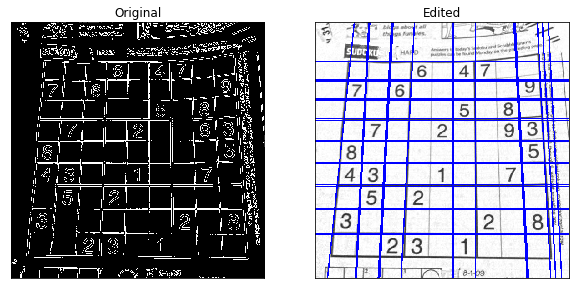

In [0]:
"""
TRANSFORMADA DE HOUGH: PROBLEMA APLICACION CONCEPTOS
"""

img = cv2.imread("sudoku.png") 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bordes = cv2.Canny(img_gray,50,200,apertureSize=3)

"""
rho – Distance resolution of the accumulator in pixels.
theta – Angle resolution of the accumulator in radians.
threshold – Accumulator threshold parameter. Only those lines are returned that get enough votes ( >\texttt{threshold} ).
"""
lineas = cv2.HoughLines(bordes, 1, np.pi/60,150)
##
for i in range(len(lineas)):
      for rho, theta in lineas[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0=a*rho
            y0=b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

#cv2.imshow("Bordes..", bordes)
#cv2.imshow("Lineas..", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
displayGray2(bordes,img)


In [0]:
"""
Lineas probabilistico:
Parameters:	
image – 8-bit, single-channel binary source image. The image may be modified by the function.
lines – Output vector of lines. Each line is represented by a 4-element vector  (x_1, y_1, x_2, y_2) , where  (x_1,y_1) and  (x_2, y_2) are the ending points of each detected line segment.
rho – Distance resolution of the accumulator in pixels.
theta – Angle resolution of the accumulator in radians.
threshold – Accumulator threshold parameter. Only those lines are returned that get enough votes ( >\texttt{threshold} ).
minLineLength – Minimum line length. Line segments shorter than that are rejected.
maxLineGap – Maximum allowed gap between points on the same line to link them.
"""
minLineLength = 50
maxLineGap = 10
lineas = cv2.HoughLinesP(bordes,1, np.pi/180, 80, minLineLength, maxLineGap) 
for i in range(len(lineas)):
      for x1,y1,x2,y2 in lineas[i]:
          cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imshow("Lineas..", img)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [0]:
"""
Opencv Circulos Hough
Parameters:	
image – 8-bit, single-channel, grayscale input image.
circles – Output vector of found circles. Each vector is encoded as a 3-element floating-point vector  (x, y, radius) .
circle_storage – In C function this is a memory storage that will contain the output sequence of found circles.
method – Detection method to use. Currently, the only implemented method is CV_HOUGH_GRADIENT , which is basically 21HT , described in [Yuen90].
dp – Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height.
minDist – Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
param1 – First method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the higher threshold of the two passed
to the Canny() edge detector (the lower one is twice smaller).
param2 – Second method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the accumulator threshold for the circle
centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.
minRadius – Minimum circle radius.
maxRadius – Maximum circle radius.

A circle is represented mathematically as (x-x_{center})^2 + (y - y_{center})^2 = r^2 where (x_{center},y_{center})
is the center of the circle, and r is the radius of the circle. From equation, we can see we have 3 parameters,
so we need a 3D accumulator for hough transform, which would be highly ineffective. So OpenCV uses more trickier method,
Hough Gradient Method which uses the gradient information of edges.
"""


cimg = cv2.imread("8circles.jpg")
img_gray = cv2.cvtColor(cimg, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img_gray,5)

circulos = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,150,param1=100,param2=30,minRadius=0,maxRadius=0)
circulos = np.uint16(np.around(circulos))

"""
Python: cv.Circle(img, center, radius, color, thickness=1, lineType=8, shift=0) → None
Parameters:	
img – Image where the circle is drawn.
center – Center of the circle.
radius – Radius of the circle.
color – Circle color.
thickness – Thickness of the circle outline, if positive. Negative thickness means that a filled circle is to be drawn.
lineType – Type of the circle boundary. See the line() description.
shift – Number of fractional bits in the coordinates of the center and in the radius value.
"""

for i in circulos[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('Circulos Detectados',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()
